# The World's Happiness
#### Tiffany Li
#### August 4, 2023

## Introduction
Different people have different purposes in life: some want to have a successful career, some want to be filthy rich, some want a family, but above everything, humans naturally want to be happy. This project explores the happiness of people from different countries and the some of the many variables that may contribute to one's happiness.

### Data

The datasets highlighted in this assignment aims to analyze the happiness of citizens in each country, focusing on different variables that may influence them. One dataset discusses the changes of these variables in each country over the years while the other dataset describes the 2022 happiness scores of each country, with the supporting variable scores. 

### Link

This data is taken from the 2022 World Happiness Report at https://worldhappiness.report/ed/2022/. 

### Motivations 

I think one of the many things I’m interested in and enjoy analyzing is human behavior – why people think a certain way and/or how things may affect them. With Generation Z bringing a lot more awareness to mental health, it sparked a curiosity in me to think about our happiness and what factors may play a role. Is it dependent on our countries’ policies? Our cultural factors? What variables are there? With COVID-19 trampling our world in recent years, I’ve also thought a lot about how that has affected who we are as a society. I know I personally have been affected by this in more ways than one, so I was curious to see if the numbers reflect this as well, especially when it pertains to our happiness.

### Research Questions

For this assignment, I decided to compare the happiness variable factors of different countries, contrasting those of high rankings and those with low. I am curious to know:
* Which variable plays the largest factor in the happiness of each country?
* Does that variable have any correlation with other vairables? What examples can we use to support these relationships?

Due to COVID occurring in recent years, I also wanted to see if there was any major difference between the two countries (or even if COVID is reflected in the data of each individual country). 

## Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Happiness_Report = 'HappinessReportCSV.csv'
Happiness_Score = 'HappinessScoreData.csv'
df1 = pd.read_csv(Happiness_Report)
df2 = pd.read_csv(Happiness_Score)

In [2]:
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


This dataset discusses different variables that was used to measure the happiness of citizens in different countries. Life ladder is an average made of up where citizens feel they stand on a scale of 0-10 regarding their happiness in life. Log GDP per capita is taken from the World Development Indicators and healthy life expectancy from the World Health Organization (WHO). The other factors are averages of scores based on binary numbers (yes/no) regarding questions about the respective variable. 

In [3]:
df2.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


This dataset has the values generated from regressions run on each variable to determine how much they affect happiness. These values are added up to get a summed happiness score, which the rankings are based on, with the highest happiness score being at the top of the ranks and the lowest being at the bottom.

### Exploratory Data Visualizations

Text(0.5, 1.0, 'Composition of Happiness Scores for the United States')

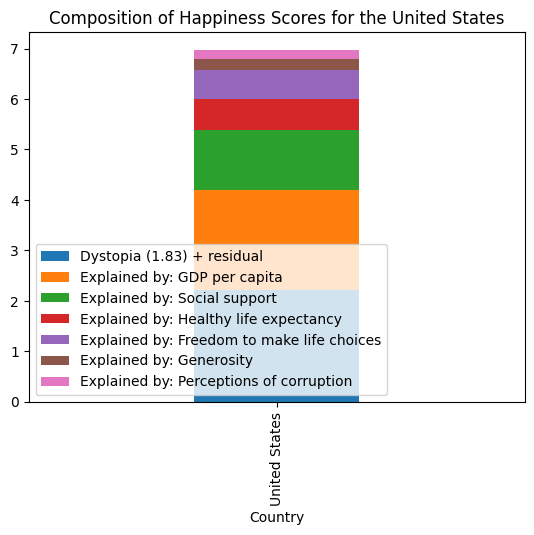

In [4]:
df2.loc[df2['Country'] == 'United States']
US_df = df2.loc[df2['Country']=='United States', (df2.columns.str.contains('Expl')) | 
                       (df2.columns.str.contains('Dys')) |
                        (df2.columns.str.contains('Country'))].copy()
US_df.plot.bar(x='Country', width = 0.25, stacked=True)
plt.title('Composition of Happiness Scores for the United States')

This is the composition of happiness for the United States, the country in which I reside in. It seems as though GDP plays a large part in the what makes American citizens happy. 

Text(0.5, 1.0, 'Composition of Happiness Scores for Afghanistan')

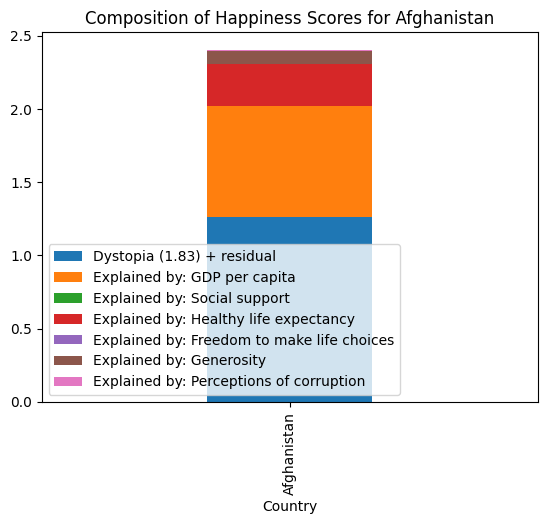

In [5]:
df2.loc[df2['Country'] == 'Afghanistan']
afg_df = df2.loc[df2['Country']=='Afghanistan', (df2.columns.str.contains('Expl')) | 
                       (df2.columns.str.contains('Dys')) |
                        (df2.columns.str.contains('Country'))].copy()
afg_df.plot.bar(x='Country', width = 0.25, stacked=True)
plt.title('Composition of Happiness Scores for Afghanistan')

This is the composition of happiness for Afghanistan, the country that is ranked the lowest in happiness. It seems as though there is a lack of data, which results in certain variables not having scores, lowering the happiness. Based on the provided data, GDP per capita also plays a large role in their happiness.

Text(0.5, 1.0, 'Composition of Happiness Scores for Finland')

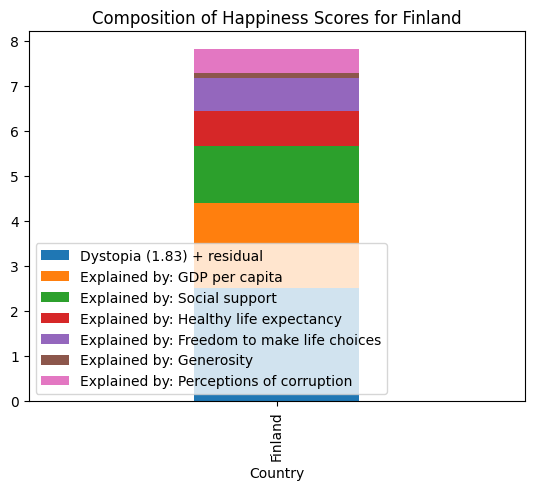

In [6]:
df2.loc[df2['Country'] == 'Finland']
fin_df = df2.loc[df2['Country']=='Finland', (df2.columns.str.contains('Expl')) | 
                       (df2.columns.str.contains('Dys')) |
                        (df2.columns.str.contains('Country'))].copy()
fin_df.plot.bar(x='Country', width = 0.25, stacked=True)
plt.title('Composition of Happiness Scores for Finland')

This is the composition of happiness for Finland, the happiest country in the world based on happiness score. It seems as though GDP per capita also plays a large role in their happiness. 

<Axes: xlabel='Healthy life expectancy at birth', ylabel='Log GDP per capita'>

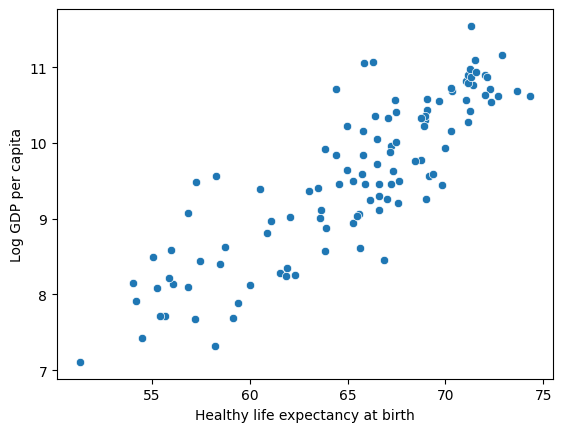

In [8]:
import seaborn as sns
df1_2021 = df1.loc[df1['year'] == 2021]
sns.scatterplot(df1_2021, x='Healthy life expectancy at birth',y='Log GDP per capita')

This graph shows the healthy life expectancy at birth in respect to log gdp per capita in every country. It suggests there is a relationship between the two variables, with the graph indicating there is a positive relationship.

### Analysis

In [ ]:
# I want to create a graph that shows multiple examples of GDP having a relationship with other variables in different years 

In [ ]:
# I want to create a bar graph comparing the top ranked countries' GDPs with the lower ranked countries to show it plays a 
# large role in the happiness of countries (see if there is a relationship)

In [ ]:
# I would like to look at how peoples perception of happiness has changed throughout the years (life ladder) and compare it to 
# the changes in gdp (and even look at if there are any significant events that may affect the two)

In [ ]:
# I want to create a visualization that lookjs at data between 2019-2021 to see a before, during, and after in regards to Covid
# and how Covid may have affected happiness scores and the variables surrounding it.

## Results

## Discussion